# Exercise 9: Comparing data to predictions (20 points)

The exercise this week will allow you to gain some experience with comparing data to predictions, such as how well two variables are correlated.

### Tips for completing this exercise

- Use **exactly** the same variable names as in the instructions because your answers will be automatically graded, and the tests that grade your answers rely on following the same formatting or variable naming as in the instructions.
- **Please do not**:

    - **Change the file names**. Do all of your editing in the provided `Exercise-9-problems-1-3.ipynb` file (this file).
    - **Change the existing cell types**. You can add cells, but changing the cell types for existing cells (from code to markdown, for example) will also cause the automated grader to fail. 

## Problem 1: Linear data regression for detecting changing climate (8.5 points)

For this problem we will again use the NOAA climate data from previous exercises with a slight twist. As a reminder, you will be working with a climate data file from the [US National Oceanographic and Atmospheric Administration (NOAA) climate database](https://www.ncdc.noaa.gov/cdo-web/). In order to jump right into things, we have provided you with [a data file that has already been processed](data/seasonal-temps.csv) containing the means and standard deviations of seasonal temperatures (in Celsius) for winter and summer for the years 1966-2022. The first 5 lines of the data file are:

```
Year,Jan mean,Jan std,May temp,May std
1966,26.741935,0.478730,28.706452,1.139279
1967,26.119355,1.172865,29.219355,0.480569
1968,26.467742,0.813383,29.135484,0.526339
1969,26.100000,0.643428,29.016129,0.873726
```

Your task is to load this data and use a least squares regression to fit trendlines to the temperature data.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Reading in the data file for this exercise
- Properly converting the linear regressions formulas to a Python function and adding it to your `gdam_functions.py` script file from Exercise 8
- Calculating the least-squares regression lines for "summer" (May) and winter (January), for two different time periods
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook **and script file** to your GitHub repository for this week's exercise

### Part 1: Reading the data file (1 point)

Your first task is to read in [the data file for this problem](data/seasonal-temps.csv).

- For this, you should use the Pandas `read_csv()` funtion to read in the data file [data/seasonal-temps.csv](data/seasonal-temps.csv) into the variable `data`
    - You do not need to skip any rows or specify an index column

In [1]:
# Import Pandas and NumPy
import pandas as pd
import numpy as np

data = None

# YOUR CODE HERE
# Store the absolute file path into a raw string variable 'fp'
fp = r'data/seasonal-temps-mac.csv'
data = pd.read_csv(fp)

In [2]:
# This test should print the first row of the data file
print("First row of the DataFrame:\n", data.head(1))


First row of the DataFrame:
    Year   Jan mean  Jan std   May mean   May std
0  1966  26.741935  0.47873  28.706452  1.139279


### Part 2: A linear regression function (1.5 points)

Your next task in this problem is to create a function that calculates the slopes `B` and *y*-intercepts `A` for [unweighted linear regression lines](https://introqg-site.readthedocs.io/en/latest/notebooks/L2/least-squares.html). As you may recall from the lesson, `A` and `B` can be calculated as

\begin{equation}
  \Large
  A = \frac{\sum{x^2} \sum{y} - \sum{x} \sum{x y}}{\Delta}
\end{equation}

and

\begin{equation}
  \Large
  B = \frac{N \sum{x y} - \sum{x} \sum{y}}{\Delta},
\end{equation}

where

\begin{equation}
  \Large
  \Delta = N \sum{x^2} - \left(\sum{x} \right)^2.
\end{equation}

- Create a function `linregress` in your `gdam_functions.py` script file that returns the slope `B` and *y*-intercept `A` for a regression line for data `x` and `y`.
    - **NOTE**: You can return both `A` and `B` in the same `return` statement by separating the values with a comma
    - **NOTE**: You may need to restart your kernel in order for the new function to be imported. You may receive an `ImportError` otherwise.

In [3]:
# Import your new function below using the format "from gdam_functions import linregress"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
from gdam_functions import linregress

In [4]:
# These visible tests with fake data should work
import numpy as np
from nose.tools import ok_, assert_equal

# Fake data for linregress tests
x1 = np.array([1.0, 2.0])
y1 = np.array([1.0, 2.0])
x2 = np.array([1.0, 2.0, 2.5, 3.6, 4.2, 5.9])
y2 = np.array([1.0, 2.0, 2.7, 3.1, 4.7, 5.7])

# Fake line slopes, intercepts
a1, b1 = linregress(x1, y1)
a2, b2 = linregress(x2, y2)

# Print results
print(f"Slope and intercept for dataset 1: {b1:.4f} and {a1:.4f}.")
print(f"Slope and intercept for dataset 2: {b2:.4f} and {a2:.4f}.")

# Check that the linregress function works
assert_equal(a1, 0.0)
assert_equal(b1, 1.0)
assert_equal(round(a2, 4), 0.0799)
assert_equal(round(b2, 4), 0.975)

Slope and intercept for dataset 1: 1.0000 and 0.0000.
Slope and intercept for dataset 2: 0.9750 and 0.0799.


### Part 3: Calculating seasonal regression lines (1.5 points)

Now we can calculate the slopes and y-intercepts for our weather data to determine how summer and winter temperatures have varied over the observation period. We'll do this for two time ranges: The **entire observation period** and the **last 20 years (2003-2022)**.

- Use your `linregress` function to calculate the slopes and intercepts for summer and winter for the time periods mentioned above (the entire range of years, and 2003-2022).
You should name these values as follows:
    - Entire range of years: `A_winter` and `B_winter` for winter, `A_summer` and `B_summer` for summer
    - Last 20 years: `A_winter20` and `B_winter20` for winter, `A_summer20` and `B_summer20` for summer

**Hint**: In this problem, `x` will be your time data, and `y` will be your temperatures.

In [5]:
# Your calculations go below.
# Note: Replace both of the 'None' values with a single call of linregress() on each line
A_winter, B_winter = None, None
A_summer, B_summer = None, None
A_winter20, B_winter20 = None, None
A_summer20, B_summer20 = None, None

# YOUR CODE HERE
# Calculate A (y-intercept) and B (slope) for each season and time period
A_winter, B_winter = linregress(data['Year'], data['Jan mean'])
A_summer, B_summer = linregress(data['Year'], data['May mean'])
A_winter20, B_winter20 = linregress(data.iloc[-20:, 0], data.iloc[-20:, 1]) # '-20:' as index of the last 20 values in the '0' indexed column which is 'Year'
A_summer20, B_summer20 = linregress(data.iloc[-20:, 0], data.iloc[-20:, 3])

In [6]:
###### This test should work
print(f"Winter (all years) slope: {B_winter:.5f}. Expected value: 0.00536.")
print(f"Winter (all years) intercept {A_winter:.1f}. Expected value: 16.0")


Winter (all years) slope: 0.00536. Expected value: 0.00536.
Winter (all years) intercept 16.0. Expected value: 16.0


In [7]:
# This test should work
print(f"Summer (last 20 years) slope: {B_summer20:.5f}. Expected value: 0.02437.")
print(f"Summer (last 20 years) intercept: {A_summer20:.1f}. Expected value: -19.8.")


Summer (last 20 years) slope: 0.02437. Expected value: 0.02437.
Summer (last 20 years) intercept: -19.8. Expected value: -19.8.


### Part 4: Plotting your results (4.5 points)

Your last coding task for this problem is to create some plots of your seasonal temperature data and their trendlines. An example of the types of plots you should create are below.
**Note**: You could create two separate plots for the different time periods, and not use subplots as shown in the example below.

![Temperature trends in Helsinki](img/temp-slopes.png)

- Create 2 plots of the seasonal temperature data: (**1**) one for the entire time covered in the data and (**2**) another for the last 20 years of data
    - Plot the seasonal average temperature data as a Pandas scatter plot with error bars showing the standard deviation in seasonal temperature
    - Also plot the regression lines for each season as well to compare to the yearly temperature data. You may want to consult [the hints for this week's exercise](https://geo-python-upd.readthedocs.io/en/latest/lessons/L9/exercise-9.html#general-hints-for-exercise-9) about how to plot the regression lines.
    - Plot the temperature data for both seasons on the same plot, using a warm color (e.g., red) for summer and a cool color (e.g., blue) for winter. You can find some convenient color names you can use in the [Matplotlib documentation online](https://matplotlib.org/stable/gallery/color/named_colors.html).
    - Be sure to set the figure size to be slightly larger, as was done in Exercise 1
- Include axis labels, a title and a legend for each plot, as well as text displaying the slope of the regression lines for both the summer and winter seasons
    - If your plot legend is empty, be sure that you have a label included for the scatter plot for each season with the text name of that season
- Add figure captions in the Markdown cell below each Python cell for your plots that describe the plots as if they were in a scientific journal article

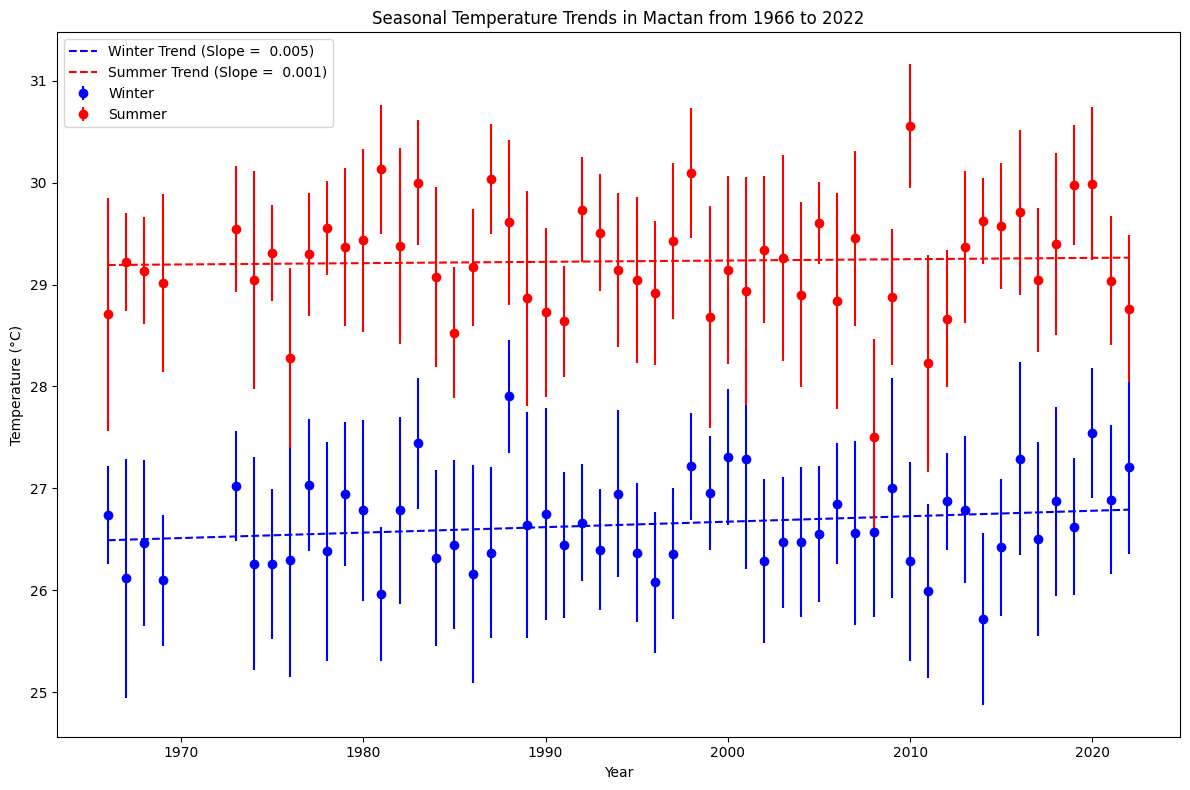

In [8]:
# Plot for all years goes here
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

ax = None

# YOUR CODE HERE
# Set the size of the plot
fig, ax = plt.subplots(figsize = (12,8))

# Plot the Winter data with error bars
ax.errorbar(data['Year'], data['Jan mean'],
            label = 'Winter',
            fmt = 'o',
            color = 'blue',
            yerr = data['Jan std'])

# Plot the Winter regression line
ax.plot(data['Year'], A_winter + B_winter * data['Year'],
        label = f'Winter Trend (Slope = {B_winter: .3f})',
        ls = '--',
        color = 'blue')

# Plot the Summer data with error bars
ax.errorbar(data['Year'], data['May mean'],
            label = 'Summer',
            fmt = 'o',
            color = 'red',
            yerr = data['May std'])

# Plot the Summer regression line
ax.plot(data['Year'], A_summer + B_summer * data['Year'],
        label = f'Summer Trend (Slope = {B_summer: .3f})',
        ls = '--',
        color = 'red')

# Add title, legend, and labels
ax.set_title('Seasonal Temperature Trends in Mactan from 1966 to 2022')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')

# To avoid overlaps of plot elements
plt.tight_layout()

**Figure 1.** Seasonal temperature trends in Mactan from 1966 to 2022.

In [ ]:
# Plot for last 20 years goes here

ax2 = None

# YOUR CODE HERE
raise NotImplementedError()

*The cell on top of this cell cannot be edited.*

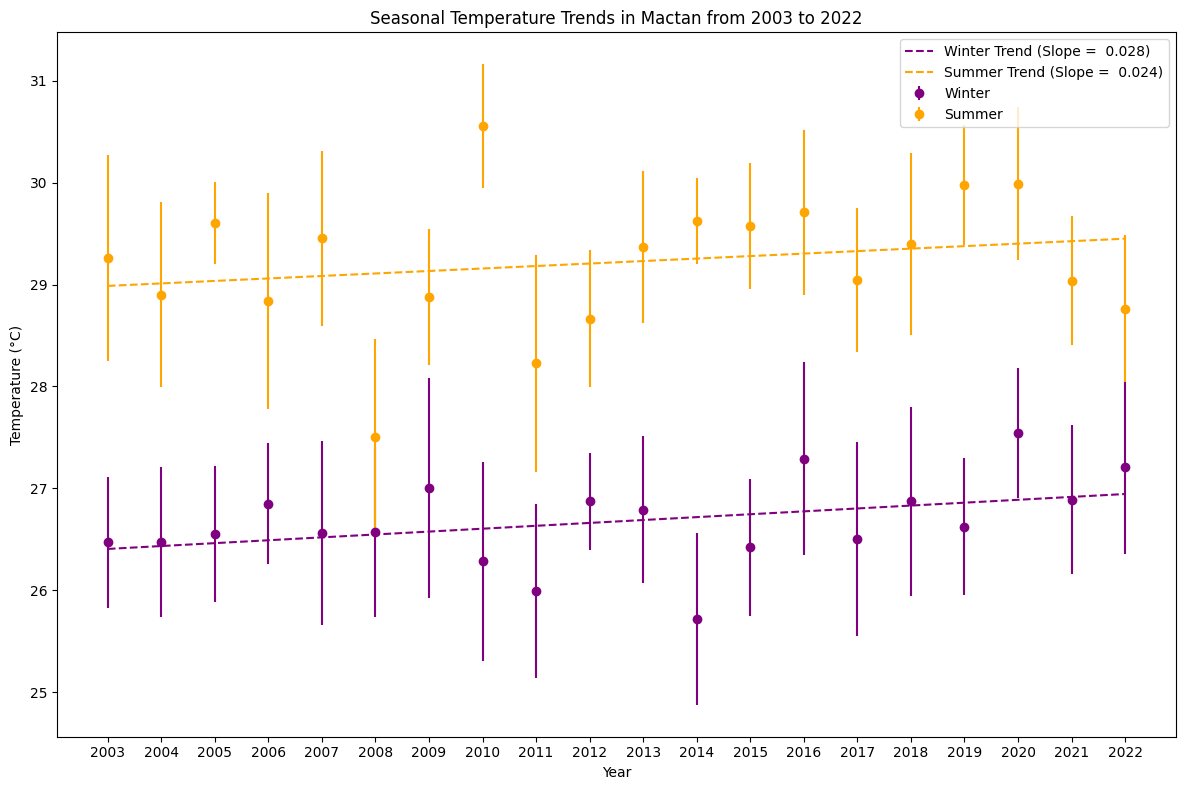

In [9]:
# Import MultipleLocator function to edit the tick intervals of the Years
from matplotlib.ticker import MultipleLocator

# Set the size of the plot
fig, ax2 = plt.subplots(figsize = (12,8))

# Plot the Winter data for the last 20 years
ax2.errorbar(data.iloc[-20:, 0], data.iloc[-20:, 1],
             label = 'Winter',
             fmt = 'o',
             color = 'purple',
             yerr = data.iloc[-20:, 2])

# Plot the Winter regression line for the last 20 years
ax2.plot(data.iloc[-20:, 0], A_winter20 + B_winter20 * data.iloc[-20:, 0],
         label = f'Winter Trend (Slope = {B_winter20: .3f})',
         ls = '--',
         color = 'purple')

# Plot the Summer data for the last 20 years
ax2.errorbar(data.iloc[-20:, 0], data.iloc[-20:, 3],
             label = 'Summer',
             fmt = 'o',
             color = 'orange',
             yerr = data.iloc[-20:, 4])

# Plot the Summer regression line for the last 20 years
ax2.plot(data.iloc[-20:, 0], A_summer20 + B_summer20 * data.iloc[-20:, 0],
         label = f'Summer Trend (Slope = {B_summer20: .3f})',
         ls = '--',
        color = 'orange')

# Add title, legend, and labels
ax2.set_title('Seasonal Temperature Trends in Mactan from 2003 to 2022')
ax2.legend()
ax2.set_xlabel('Year')
ax2.set_ylabel('Temperature (°C)')

# To avoid overlaps in the plot elements
plt.tight_layout()

# Set major tick intervals
ax2.xaxis.set_major_locator(MultipleLocator(1))

**Figure 2.** Seasonal temperature trends in Mactan from 2003 to 2022.

## Problem 2 - Linear correlation: Is a line a good fit for our data? (6 points)

In Problem 1 we used least squares regressions to calculate lines that best fit our data. One thing we did not consider, however, was whether a line was a suitable model for our data. To consider this another way, we could ask ourselves how well do our data plot on a line? This question will be the focus of Problem 2, where we will calculate the linear correlation coefficient $r$ to explore how well our data fall on a line. Notably, in doing this we will *not* consider the standard deviations in our seasonal temperatures, only the mean values for the different seasons.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Properly converting the linear correlation coefficient formula to a Python function and adding it to your `gdam_functions.py` script file.
- Calculating linear corelation coefficients for summer and winter and for the two different time periods
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook and modified script file to your GitHub repository for this week's exercise

### Part 1: A correlation coefficient function (1.5 points)

As we have seen in this week's lesson, the correlation coefficient $r$ can be used to determine how well two variables are linearly correlated with one another. In other words, how well does a line relate the two. Mathematically, we can define the correlation coefficient $r$ as

\begin{equation}
  \Large
  r = \frac{\sum{\left(x_{i} - \bar{x} \right)\left(y_{i} - \bar{y} \right)}}{\sqrt{\sum{\left(x_{i} - \bar{x} \right)^2} \sum{\left(y_{i} - \bar{y} \right)^2}}},
\end{equation}

where $x_{i}$ is the $i$th value along the $x$-axis, $\bar{x}$ is the mean of the values on the $x$-axis, and similarly for the values of $y$.

Your task in this part of the problem is to make a function for calculating $r$.

- Create a function `pearson()` in your `gdam_functions.py` script file that returns the correlation coefficient $r$ between two variables `x` and `y`

In [ ]:
# Import your new function below using the format "from introqg_functions import pearson"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
raise NotImplementedError()

*The cell above this cell cannot be edited.*

In [10]:
from gdam_functions import pearson

In [11]:
# These visible tests with fake data should work
from nose.tools import ok_, assert_equal

# Fake data for pearson tests
x1 = np.array([1.0, 2.0, 3.0])
y1 = np.array([1.0, 2.0, 2.1])
x2 = np.array([1.0, 2.0, 2.5, 3.6, 4.2, 5.9])
y2 = np.array([5.7, 4.2, 3.6, 5.4, 2.0, 1.0])

# Fake correlation coefficients
r1 = pearson(x1, y1)
r2 = pearson(x2, y2)

# Print results
print(f"Correlation coefficient for dataset 1: {r1:.4f}.")
print(f"Correlation coefficient for dataset 2: {r2:.4f}.")

# Check that the pearson function works
assert_equal(round(r1, 4), 0.9042)
assert_equal(round(r2, 4), -0.8156)

Correlation coefficient for dataset 1: 0.9042.
Correlation coefficient for dataset 2: -0.8156.


### Part 2: Calculating correlation coefficients (1.5 points)

Next, we can calculate the correlation coefficients for our weather data.

- Calculate correlation coefficients for the summer and winter and for both time ranges (the entire range of years, and 2003-2022) using your `pearson()` function.
You should name these values as follows:
    - Entire range of years: `r_winter` for winter and `r_summer` for summer
    - Last 20 years: `r_winter20` for winter, `r_summer20` for summer

In [12]:
r_winter = None
r_summer = None
r_winter20 = None
r_summer20 = None

# YOUR CODE HERE
# Calculate the correlation coefficients for each season and time period using the imported 'pearson' function
r_winter = pearson(data['Year'], data['Jan mean'])
r_summer = pearson(data['Year'], data['May mean'])
r_winter20 = pearson(data.iloc[-20:,0], data.iloc[-20:,1])
r_summer20 = pearson(data.iloc[-20:,0], data.iloc[-20:,3])

In [13]:
# This test should work
print(f"Your winter (all years) correlation coefficient: {r_winter:.4f}. Expected value: 0.1966.")


Your winter (all years) correlation coefficient: 0.1966. Expected value: 0.1966.


In [14]:
# This test should work
print(f"Your summer (last 20 years) correlation coefficient: {r_summer20:.4f}. Expected value: 0.2144.")


Your summer (last 20 years) correlation coefficient: 0.2144. Expected value: 0.2144.


### Part 3: Plotting your results, round 2 (3 points)

Now we can generate a pair of plots showing the data along with the calculated $r$ values.

- Create 2 plots of the seasonal temperature data: (**1**) one for the entire time covered in the data and (**2**) another for the last 20 years of data
    - Plot the seasonal average temperature data as a Pandas scatter plot **without** error bars for the standard deviation in seasonal temperature
    - Also include the regression lines for each season from Problem 1 to compare to the yearly temperature data. You may want to consult [the hints for this week's exercise](https://introqg-site.readthedocs.io/en/latest/lessons/L2/exercise-2.html) about how to plot the regression lines.
    - Plot the temperature data for both seasons on the same plot, using a warm color (e.g., red) for summer and a cool color (e.g., blue) for winter. You can find some convenient color names you can use in the [Matplotlib documentation online](https://matplotlib.org/stable/gallery/color/named_colors.html).
    - Be sure to set the figure size to be slightly larger, as was done in Exercise 8
- Include axis labels, a title and a legend for each plot, as well as text displaying the correlation coefficients for both the summer and winter seasons
    - If your plot legend is empty, be sure that you have a label included for the scatter plot for each season with the text name of that season
- Add figure captions in the Markdown cell below each Python cell for your plots that describe the plots as if they were in a scientific journal article

In [ ]:
# Plot for all years goes here

ax3 = None

# YOUR CODE HERE
raise NotImplementedError()

*The cell above this cell cannot be edited.*

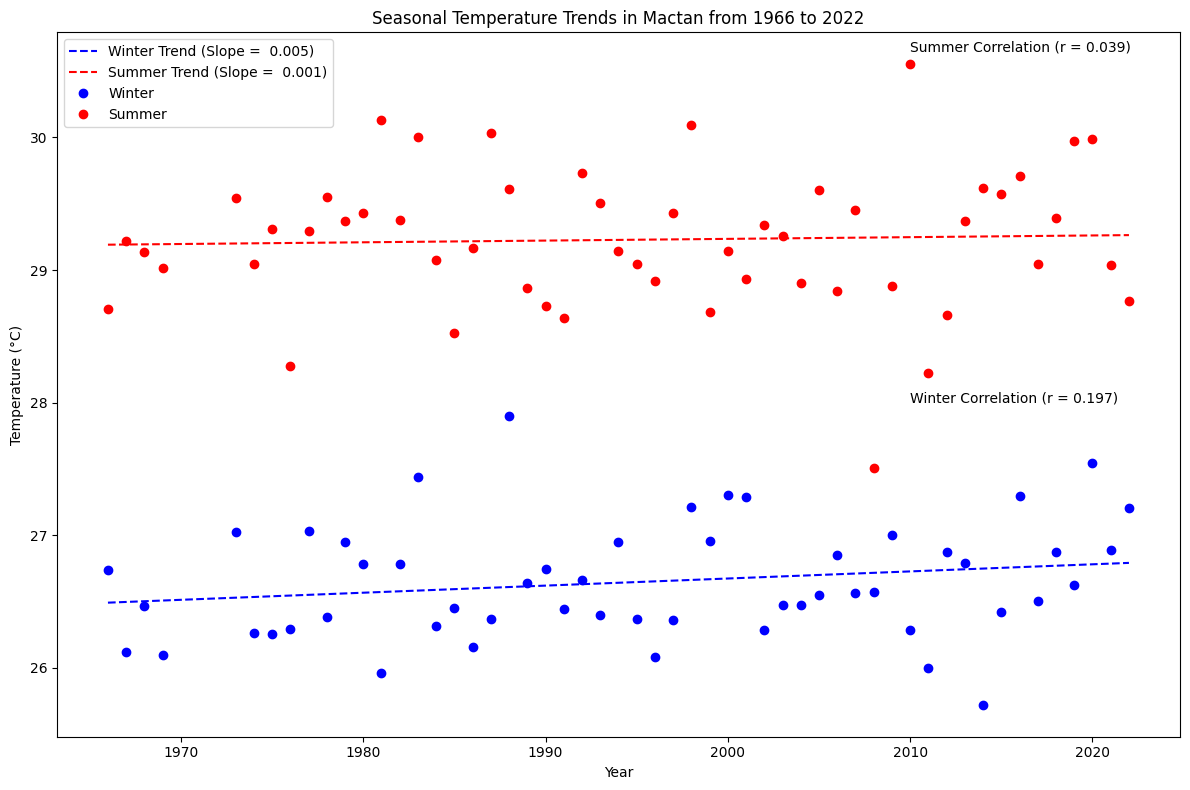

In [15]:
# Set the size of the plot without error bars
fig, ax3 = plt.subplots(figsize = (12,8))

# Plot the Winter data
ax3.errorbar(data['Year'], data['Jan mean'],
             label = 'Winter',
             fmt = 'o',
             color = 'blue')

# Plot the Winter regression line
ax3.plot(data['Year'], A_winter + B_winter * data['Year'],
         label = f'Winter Trend (Slope = {B_winter: .3f})',
         ls = '--',
        color = 'blue')

# Plot the Summer data
ax3.errorbar(data['Year'], data['May mean'],
             label = 'Summer',
             fmt = 'o',
             color = 'red')

# Plot the Summer regression line
ax3.plot(data['Year'], A_summer + B_summer * data['Year'],
         label = f'Summer Trend (Slope = {B_summer: .3f})',
         ls = '--',
        color = 'red')

# Add title, legend, and labels
ax3.set_title('Seasonal Temperature Trends in Mactan from 1966 to 2022')
ax3.legend()
ax3.text(2010, 30.65, f'Summer Correlation (r = {r_summer:.3f})')
ax3.text(2010, 28, f'Winter Correlation (r = {r_winter:.3f})')
ax3.set_xlabel('Year')
ax3.set_ylabel('Temperature (°C)')

# To avoid overlaps in the plot elements
plt.tight_layout()

**Figure 3.** Seasonal temperature trends in Mactan from 1966 to 2022. The correlation coefficients, r, for both summer and winter are shown at the right.

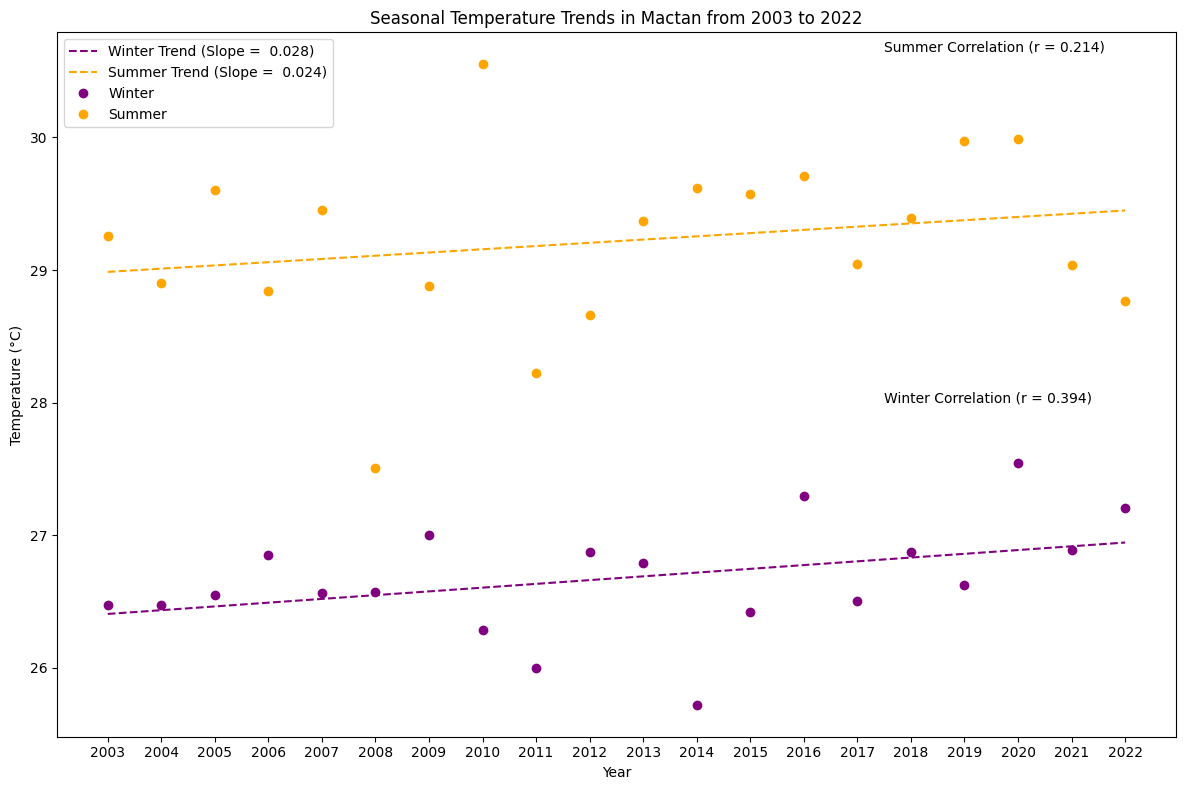

In [16]:
# Plot for the last 20 years goes here

ax4 = None

# YOUR CODE HERE
# Set the size of the plot without error bars for the last 20 years
fig, ax4 = plt.subplots(figsize = (12,8))

# Plot the Winter data
ax4.errorbar(data.iloc[-20:, 0], data.iloc[-20:, 1],
             label = 'Winter',
             fmt = 'o',
             color = 'purple')

# Plot the Winter regression line
ax4.plot(data.iloc[-20:, 0], A_winter20 + B_winter20 * data.iloc[-20:, 0],
         label = f'Winter Trend (Slope = {B_winter20: .3f})',
         ls = '--',
        color = 'purple')

# Plot the Summer data
ax4.errorbar(data.iloc[-20:, 0], data.iloc[-20:, 3],
             label = 'Summer',
             fmt = 'o',
             color = 'orange')

# Plot the Summer regression line
ax4.plot(data.iloc[-20:, 0], A_summer20 + B_summer20 * data.iloc[-20:, 0],
         label = f'Summer Trend (Slope = {B_summer20: .3f})',
         ls = '--',
        color = 'orange')

# Add title, legend, and labels
ax4.set_title('Seasonal Temperature Trends in Mactan from 2003 to 2022')
ax4.legend()
ax4.text(2017.5, 30.65, f'Summer Correlation (r = {r_summer20:.3f})')
ax4.text(2017.5, 28, f'Winter Correlation (r = {r_winter20:.3f})')
ax4.set_xlabel('Year')
ax4.set_ylabel('Temperature (°C)')

# To avoid overlaps in the plot elements
plt.tight_layout()

# Set major tick interval
ax4.xaxis.set_major_locator(MultipleLocator(1))

**Figure 4.** Seasonal temperature trends in Mactan from 2003 to 2022. The correlation coefficients, r, for both summer and winter are shown at the right.

## Problem 3: Calculating a goodness-of-fit (3.5 points)

The final part of the exercise this week is to calculate a goodness-of-fit for the lines fit to the data in Problem 1. The idea here is to consider that we have an expected value of the temperature based on our least-squares regressions, and we can see how well those expected values fit within the standard deviation of the seasonal temperatures.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Properly converting the goodness-of-fit formula to a Python function and adding that function to your `gdam_functions.py` script file
- Calculating goodness-of-fit values for summer and winter and for the two different time periods
- Including comments that explain what most lines in the code do
- Uploading your notebook and modified script file to your GitHub repository for this week's exercise

### Part 1: A goodness-of-fit function (1.5 points)

We can start by creating a function to calculate the goodness-of-fit. For this, you can use the reduced chi-squared equation,

\begin{equation}
  \Large
  \chi^{2} = \frac{1}{N} \sum \frac{(O_{i} - E_{i})^{2}}{\sigma_{i}^2}
\end{equation}

where $N$ is the number of ages, $O_{i}$ is the $i$th observed value, $E_{i}$ is the $i$th expected value, and $\sigma_{i}$ is the $i$th standard deviation.

For this part you should:

- Create a function called `chi_squared` in your `gdam_functions.py` script file that can be used to calculate the reduced chi-squared value

In [ ]:
# Import your new function below using the format "from introqg_functions import chi_squared"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
raise NotImplementedError()

*The cell above this cell cannot be edited.*

In [17]:
from gdam_functions import chi_squared

In [18]:
# These visible tests with fake data should work
from nose.tools import ok_, assert_equal

# Fake data
obs1 = np.array([1.1, 2.9, 2.6, 3.5, 5.7, 2.8])
exp1 = np.array([1.5, 2.4, 3.6, 1.5, 6.7, 2.6])
std1 = np.array([0.5, 1.4, 0.6, 1.5, 0.7, 1.0])

obs2 = np.array([1.8, 2.3, 2.2, 3.9, 5.5, 2.4])
exp2 = np.array([1.2, 2.0, 3.9, 1.7, 6.1, 2.9])
std2 = np.array([0.2, 0.4, 1.6, 2.5, 0.5, 0.3])

# Fake goodness-of-fit values
cs1 = chi_squared(obs1, exp1, std1)
cs2 = chi_squared(obs2, exp2, std2)

# Print results
print(f"Goodness-of-fit for dataset 1: {cs1:.4f}.")
print(f"Goodness-of-fit for dataset 2: {cs2:.4f}.")

# Check that the chi-squared function works
assert_equal(round(cs1, 4), 1.2340)
assert_equal(round(cs2, 4), 2.6139)

Goodness-of-fit for dataset 1: 1.2340.
Goodness-of-fit for dataset 2: 2.6139.


### Part 2: Calculating goodness-of-fit (2 points)

Next, we can calculate the goodness-of-fit for each point along our line and the corresponding observed seasonal mean temperaure. We will do this by first creating arrays of expected temperature values for each season and time period, and then calculating the goodness-of-fit between those expected values and the observed temperatures.

- Create 4 arrays that contain the expected temperature value for each year based on the equation for the regression lines calculated in Problem 1
    - The variables `exp_winter` and `exp_summer` can be used for all years, while `exp_winter20` and `exp_summer20` can be used for the last 20 years
- Calculate the goodness-of-fit between the expected values and the observed mean seasonal temperatures
    - The variables `gof_winter` and `gof_summer` can be used for all years, while `gof_winter20` and `gof_summer20` can be used for the last 20 years

In [19]:
# Expected temperatures based on least-squares regression in Problem 1
exp_winter = None
exp_summer = None
exp_winter20 = None
exp_summer20 = None

# Goodness-of-fit values
gof_winter = None
gof_summer = None
gof_winter20 = None
gof_summer20 = None

# YOUR CODE HERE
# Calculate the expected temperatures based on the regression equation
exp_winter = A_winter + B_winter * data['Year']
exp_summer = A_summer + B_summer * data['Year']
exp_winter20 = A_winter20 + B_winter20 * data.iloc[-20:, 0]
exp_summer20 = A_summer20 + B_summer20 * data.iloc[-20:, 0]

# Calculate the goodness-of-fit values using 'chi-squared' function
gof_winter = chi_squared(data['Jan mean'], exp_winter, data['Jan std'])
gof_summer = chi_squared(data['May mean'], exp_summer, data['May std'])
gof_winter20 = chi_squared(data.iloc[-20:, 1], exp_winter20, data.iloc[-20:, 2])
gof_summer20 = chi_squared(data.iloc[-20:, 3], exp_summer20, data.iloc[-20:, 4])

# Import the 'mean' function from gdam_functions
from gdam_functions import mean

In [20]:
# This test should work
print(f"My mean expected winter temperature: {mean(exp_winter):.4f}. Expected value: 26.6489.")


My mean expected winter temperature: 26.6490. Expected value: 26.6489.


In [21]:
# This test should work
print(f"My summer (all years) goodness-of-fit: {gof_summer:.4f}. Expected value: 0.5692.")


My summer (all years) goodness-of-fit: 0.5692. Expected value: 0.5692.


In [22]:
# Run this cell to print all of your calculated goodness-of-fit values
print(f"My winter goodness-of-fit values:\n    All years:     {gof_winter:.4f}\n    Last 20 years: {gof_winter20:.4f}\n")
print(f"My summer goodness-of-fit values:\n    All years:     {gof_summer:.4f}\n    Last 20 years: {gof_summer20:.4f}")

My winter goodness-of-fit values:
    All years:     0.3890
    Last 20 years: 0.2378

My summer goodness-of-fit values:
    All years:     0.5692
    Last 20 years: 0.8161


## Summary questions for Exercise 2 (2 points; 0.5 points each)

Answer the questions below in a few sentences.

1. Based on the least-squares regressions calculated in Problem 1, how have summer and winter temperatures changed in Mactan over the time 1966-2022? Is the trend similar for both seasons? What about when you consider only the data over the last 20 years? Do you have any first-hand experience that relates to these temperature trends? If so, what?
2. Based on the calculation of the correlation coefficients in Problem 2, how well does it seem the data are fit by a line? Are there any significant differences between seasons or time periods in the calculated $r$ values?
3. Looking at the goodness-of-fit values calculated in Problem 3, how well does it appear the data are fit by a regression line? Do you see differences between seasons ot time period considered? 
4. Comparing the calculated $\chi^{2}$ values from Problem 3 to the $r$ values in Problem 2, what differences do you see in the numbers between seasons and/or time periods? Can you think of reasons why the $r$ and $\chi^{2}$ values might differ in terms of their relative values in each season/time period? How are the $r$ and $\chi^{2}$ values different in terms of what they measure?

**Answers:**
1. Based on the least-squares regressions, both summer and winter temperatures in Mactan similarly increased over time from 1966 to 2022 as shown by their positive slopes. This means that the temperatures have become warmer over time. When considering only the data over the last 20 years, the positive slope of both summer and winter temperatures became steeper. This means that the rate of temperature increase over the last 20 years apparently became faster relative to the rate from 1966 to 2022. This is true since the temperature is really warmer nowadays and there is recent news of Mt. Fuji in Japan not having snow.
2. Based on the correlation coefficients, the winter temperatures seem to be more fit by a line compared to the summer temperatures as shown by their values which are closer to 1.0. This is true when looking at the data from 1966 to 2022 compared to over the last 20 years. However, the correlation coefficients for the data over the last 20 years are significantly higher compared to the data from 1966 to 2022. This is because the sample size is decreased so there is less spread of the data.
3. The goodness-of-fit values for both seasons and time periods are less than 1.0 which means that on average, the predictions are within the uncertainties in the data. In general, the summer goodness-of-fit values are closer to 1.0 compared to the winter values for both time periods. This means that most expected values based on the regression line of the summer temperatures are within the uncertainties of its observed values relative to the winter temperatures.
4. The calculated $r$ values for both seasons increased when the sample size was reduced. However, this effect is not consistent in the goodness-of-fit values since the winter goodness-of-fit value decreased from the 1966-2022 data to the data from the last 20 years. The differences in the values may have been due to errors/uncertainty in the observations, the effect of the variance, and the difference with data quality during the seasons. The most obvious reason is also because the two measure different things. The $r$ indicates how strong the relationship is between the variables, while $\chi^{2}$ measures the difference between the expected and observed values.